# Statistics

In [1]:
import pandas as pd
import matplotlib.pyplot as plt


games_df = pd.read_csv("games.csv")

rounds_df = pd.read_csv("rounds_in_games.csv")

## Words

Distribution of user guesses by word length.

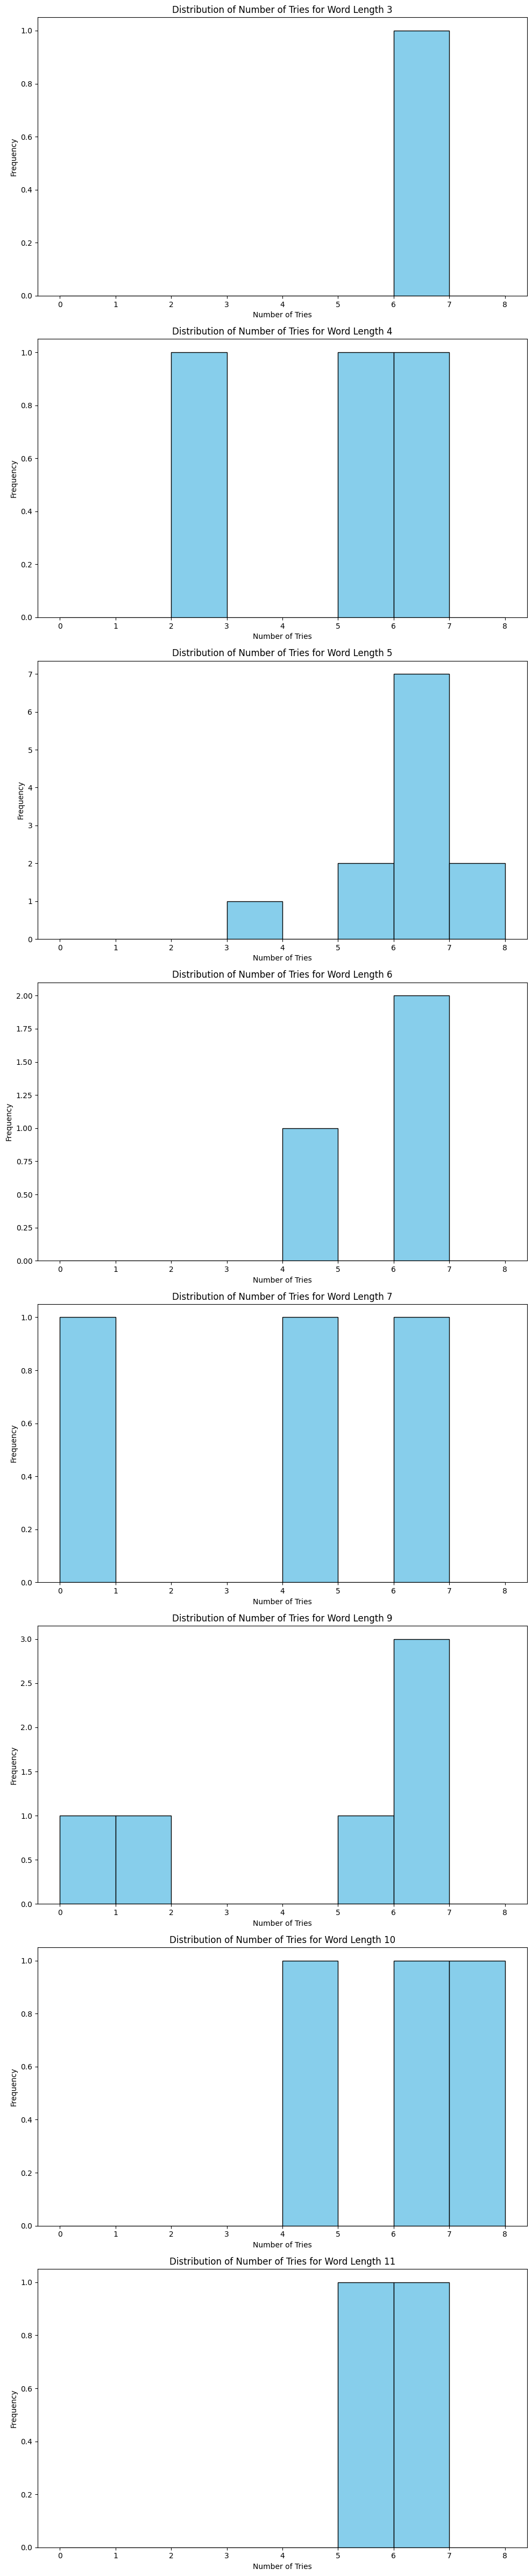

In [2]:
rounds_df["word_length"] = rounds_df["word"].apply(len)

min_user_tries = rounds_df["user_tries"].min()
max_user_tries = rounds_df["user_tries"].max()

fig, axes = plt.subplots(
    rounds_df["word_length"].nunique(),
    1,
    figsize=(10, 6 * rounds_df["word_length"].nunique()),
)

for i, (word_length, group) in enumerate(rounds_df.groupby("word_length")):
    ax = axes[i]
    ax.hist(
        group["user_tries"],
        bins=range(min_user_tries, max_user_tries + 1),
        color="skyblue",
        edgecolor="black",
    )
    ax.set_title(f"Distribution of Number of Tries for Word Length {word_length}")
    ax.set_xlabel("Number of Tries")
    ax.set_ylabel("Frequency")

plt.tight_layout()
plt.show()

## Rounds

Number of distinct users who have played.

In [3]:
distinct_usernames = games_df["username"].unique()
print(len(distinct_usernames))

7


Top 5 players by rounds won per game.

In [4]:
rounds_won_per_game = (
    rounds_df.groupby(["game_id", "username"]).agg({"victory": "sum"}).reset_index()
)

average_rounds_won = (
    rounds_won_per_game.groupby("username")["victory"].mean().reset_index()
)

top_players = average_rounds_won.nlargest(5, "victory")

print(top_players)

    username  victory
4       pepe      2.0
2      luigi      1.2
0       adam      1.0
1  charlotte      1.0
3       nick      1.0


## Game

Top 5 players by final score.

In [5]:
top_players = games_df.sort_values(by="final_score", ascending=False).head(5)[
    ["username", "final_score"]
]

print(top_players)

  username  final_score
2    luigi            3
5     pepe            2
6     nick            2
0      zen            1
1    luigi            1


Top 5 users by mean score.

In [6]:
average_score_per_user = (
    games_df.groupby("username")["final_score"].mean().reset_index()
)

top_users = average_score_per_user.nlargest(5, "final_score")

print(top_users)

    username  final_score
4       pepe     2.000000
2      luigi     1.666667
0       adam     1.000000
1  charlotte     1.000000
3       nick     1.000000


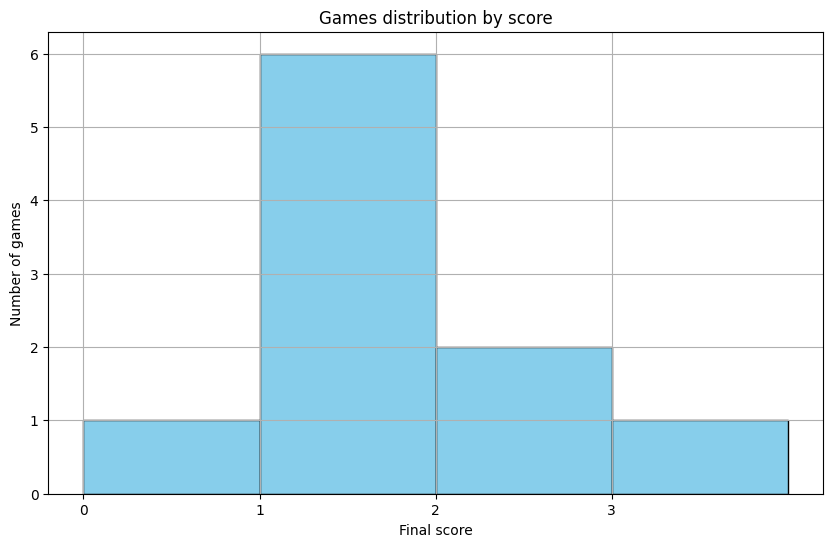

In [7]:
plt.figure(figsize=(10, 6))
plt.hist(
    games_df["final_score"], bins=[0, 1, 2, 3, 4], color="skyblue", edgecolor="black"
)

plt.title("Games distribution by score")
plt.xlabel("Final score")
plt.ylabel("Number of games")

plt.xticks(range(4))

plt.grid(True)
plt.show()